In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd 
import numpy as np
from pandas import Series, DataFrame
from numpy import nan as NA
from datetime import datetime, date
from pandas.tseries.offsets import MonthEnd

<h2>Заргрузка исходных данных</h2>

In [27]:
report = pd.read_pickle('/Users/popov/Documents/Python/Pybursa/Web/report_pickle')
data = pd.read_pickle('/Users/popov/Documents/Python/Pybursa/Web/data_pickle')

In [28]:
offset = MonthEnd()
curr_month = report.index[-1]
prev_month, next_month = curr_month - offset, curr_month + offset

<h3>Отчётный месяц</h3>

In [29]:
'{:%B %Y}'.format(curr_month)

'December 2018'

<h2>Основная таблица</h2>

In [30]:
rep_2017 = report['2017':]
rep_2018 = report['2018':] # данные за 2018 год
rep_2018

channels                           goals                       
             yandex google go.mail.ru bry cpc order basket contact measure
2018-01-31     2477   1881         32   5   0     1     74     136      12
2018-02-28     2527   1625         44   7   0     3    121     130      16
2018-03-31     2568   1997         51   6   0    10     79     197      12
2018-04-30     2359   2410         74   5   0     1     56     129       9
2018-05-31     2166   2355         65   4   0     1     42     131      12
2018-06-30     2361   2369         32   3   0     7     64     150      17
2018-07-31     2435   2513         69   1   0     7     51     184       7
2018-08-31     2637   2437         59   1   0     5    115     161       9
2018-09-30     2591   2343         85   4   0     2     84     134       9
2018-10-31     2746   2665         77   2   0     7     86     166      12
2018-11-30     2914   2444         61   3   0     5    162     182      24
2018-12-31     2948   2292         72   4   0     4    116     211      11

<h3>Разница между отчетным и предшествующим месяцами</h3>

In [31]:
rep_diff = report.diff(periods=1) # разница от месяца к месяцу
rep_diff[curr_month:].astype(int) # разница между предыдущим и отчетным месяцами

channels                           goals                       
             yandex google go.mail.ru bry cpc order basket contact measure
2018-12-31       34   -152         11   1   0    -1    -46      29     -13

<h2>Графики</h2>
<h3>Столбчатая диаграмма соотношения каналов трафика</h3>

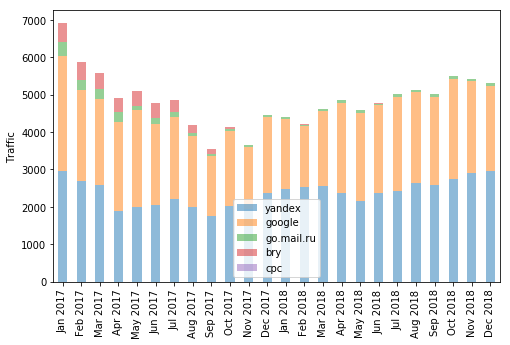

In [32]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1, 1, 1)
rep_2017.channels.plot(ax=ax, kind='bar', stacked=True, alpha=0.5);
ax.set_ylabel('Traffic');
ax.legend(loc='lower center');
#fig.autofmt_xdate()
ticks = ax.set_xticklabels(['{:%b %Y}'.format(x) for x in rep_2017.index]);

<h3>Линейная диаграмма изменений трафика</h3>

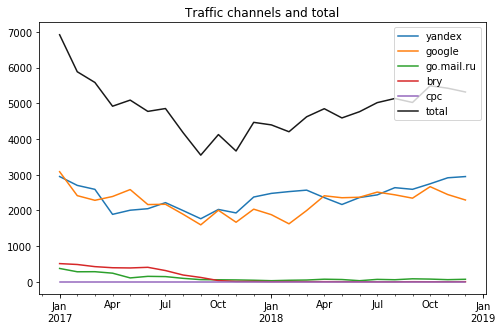

In [33]:
fig = plt.figure(figsize=(8,5));
ax = fig.add_subplot(111);
rep_2017.channels.plot(ax=ax);
rep_2017.channels.sum(axis=1).plot(color=(0,0,0), linewidth=1.5, alpha=.9, label='total');
ax.set_title('Traffic channels and total')
ax.legend(loc='upper right');

<h2>Табличные данные</h2>
<h3>Ключевые слова и количество визитов</h3>

In [34]:
kw = 'keyword visit'.split()

In [35]:
data.visit = data.visit.astype(int)
data[kw]

keyword  visit
bing       0                                 купить складную дверь      1
go.mail.ru 0                                             (not set)     72
google     0                                         дешевые двери    256
           1                                          двери дешево    253
           2                                       двери из дерева    134
           3                             np - /?cnt=catalog&r=1428    103
           4                             np - /?cnt=catalog&r=2438     89
           5                                      np - /?pid=pokaz     76
           6                                                np - /     62
           7                                         двери продажа     34
           8                                         полотно двери     18
           9                                дверные полотна купить     17
           10                              np - /?pid=menu-katalog     10
           11                                      недорогие двери      8
           12                                     np - /?pid=about      7
           13                                     двери с коробкой      7
           14                               дверное полотно дешево      7
           15                             np - /?cnt=catalog&r=577      5
           16                                        двери полотно      5
           17                                    полотно для двери      5
           18                            np - /?cnt=catalog&r=1792      4
           19                            np - /?cnt=catalog&r=2078      4
           20           np - /?pid=derevyannye-mezhkomnatnye-dveri      4
           21                                      полотна дверные      4
           22                            np - /?cnt=catalog&r=1010      3
           23                                       двери в ванную      3
           24                            np - /?cnt=catalog&r=1437      2
           25                            np - /?cnt=catalog&r=1793      2
           26                            np - /?cnt=catalog&r=1935      2
           27                             np - /?cnt=catalog&r=195      2
...                                                            ...    ...
yandex     1921                 цветное полотно для выкатной двери      1
           1922               цветные межкомнатная дверь со склада      1
           1923                        цена двери механизм компакт      1
           1924                       цена дверного полотна из мдф      1
           1925  цена дверного полотна из мдф в магазине летуал...      1
           1926                     цены застеклить кухонную дверь      1
           1927                             цены на двери гармошка      1
           1928     цех кухонных дверей на заказ в городе Подольск      1
           1929     чехов декабрь 20й8 кухонные дверцы в рассрочку      1
           1930                   ширина дверного полотна 40 60 см      1
           1931                       широкие двери гармошки браво      1
           1932                            широкие дверные полотна      1
           1933             шпонированные двери со склада в москве      1
           1934  штора гармошка высота 2500 на дверь купить с у...      1
           1935                            штора гармошка на дверь      1
           1936                              щербинка склад дверей      1
           1937                        эклиссе механизм для дверей      1
           1938  эльбор двери официальный сайт москва цены на т...      1
           1939                       эльбрус двери в эмали москва      1
           1940                 эмалевые двери межкомнатные отзывы      1
           1941                      эмалевые двери плюсы и минусы      1
           1942            эмалевые двери слоновая кость в наличии      1
           1943                                эмалированные дв

<h3>Самые популярные ключевые слова по каждой поисковой системе</h3>

In [36]:
data.groupby(level=0, axis=0)[kw].apply(lambda x: x.xs(x.visit.idxmax())) #.xs(0, level=1)

,keyword,visit
bing,купить складную дверь,1
go.mail.ru,(not set),72
google,дешевые двери,256
rambler,Двери took.took,1
yandex,дверь гармошка,173


<h3>Топ-5 запросов по каждой поисковой системе</h3>

In [37]:
data_grupped = data.sort_values('visit', ascending=False).groupby(level=0, axis=0) # группировка по поисковой системе
data_top5 = data_grupped[['keyword', 'visit']].apply(lambda x: x.iloc[:5]) # топ-5 каждой ПС
data_top5.reset_index(level=0).drop('level_0', axis=1)

keyword  visit
bing       0                       купить складную дверь      1
go.mail.ru 0                                   (not set)     72
google     0                               дешевые двери    256
           1                                двери дешево    253
           2                             двери из дерева    134
           3                   np - /?cnt=catalog&r=1428    103
           4                   np - /?cnt=catalog&r=2438     89
rambler    2         полотно дверное сосна 90х200 купить      1
           1  дверь ламинированная ДПГ 2100-1100-70 цена      1
           0                             Двери took.took      1
yandex     4                              дверь гармошка    173
           5                              двери гармошка     92
           0                                   (not set)     63
           6                 дверь гармошка леруа мерлен     33
           7                             дверное полотно     29